In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import IncrementalPCA
import numpy as np
import pickle

In [2]:
review_score = int(input("Enter the review score: "))

In [3]:
df = pd.read_csv('../../Warehouse/Reviews/app_reviews_merged.csv')

In [4]:
# Preprocess the data
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['content'].fillna(''))

The elbow method is a technique used to determine the optimal number of clusters in a dataset when applying a clustering algorithm like K-Means. The elbow map (or plot) visualizes the relationship between the number of clusters and the Within-Cluster-Sum-of-Squares (WCSS) metric.

WCSS is the sum of the squared distances between each data point and the centroid of the cluster it belongs to. As the number of clusters increases, the WCSS decreases because data points are more likely to be closer to their respective centroids. However, after a certain point, adding more clusters results in only marginal improvements in the WCSS.

The elbow map signifies this relationship by plotting the WCSS values against the number of clusters. The "elbow" point in the plot is where the rate of decrease in WCSS starts to slow down significantly, indicating that adding more clusters beyond this point will not provide substantial improvements in the WCSS. This "elbow" point is used as the optimal number of clusters for the clustering algorithm, as it represents a good balance between the number of clusters and the compactness of those clusters.

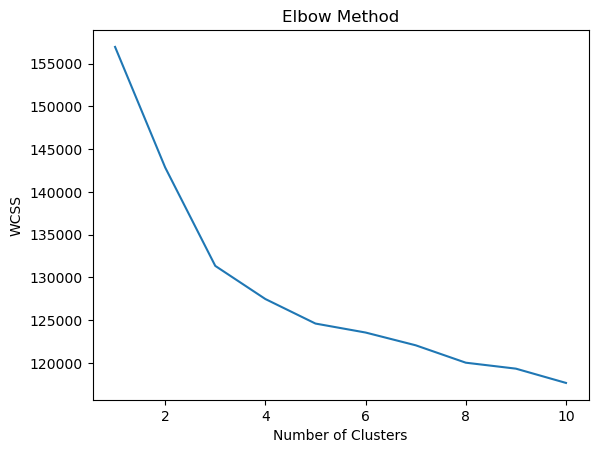

In [5]:
# Determine the optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
# Train the K-Means clustering model
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

In [7]:
# Use incremental PCA to reduce memory usage
n_components = 2
batch_size = 1000
ipca = IncrementalPCA(n_components=n_components, batch_size=batch_size)
for i in range(0, X.shape[0], batch_size):
    batch = X[i:i+batch_size].toarray()
    ipca.partial_fit(batch)

X_pca = None

for i in range(0, X.shape[0], batch_size):
    batch = X[i:i+batch_size].toarray()
    if X_pca is None:
        X_pca = ipca.transform(batch)
    else:
        X_pca = np.vstack((X_pca, ipca.transform(batch))) 

In [8]:
# save the model to a pickle file
pickle.dump(kmeans, open('kmeans.pkl', 'wb'))

The cluster map (scatter plot) is a visualization of the clusters formed by the K-Means algorithm on the app reviews dataset. The purpose of the cluster map is to help you understand the distribution and relationships among the data points in a lower-dimensional space, making it easier to interpret the results of the clustering process.

In this specific case, the scatter plot displays the data points in a 2-dimensional space, which is achieved by using Incremental PCA for dimensionality reduction. Each point in the plot represents a single app review, and the color of the point indicates the cluster it belongs to, as determined by the K-Means clustering algorithm.

The cluster map allows you to visually assess the quality of the clustering, identify any patterns or groupings, and evaluate how well the clusters separate the reviews based on their content. By examining the cluster map, you can gain insights into the structure of your data and identify relationships or similarities among the reviews that may not be immediately apparent through other means of analysis.

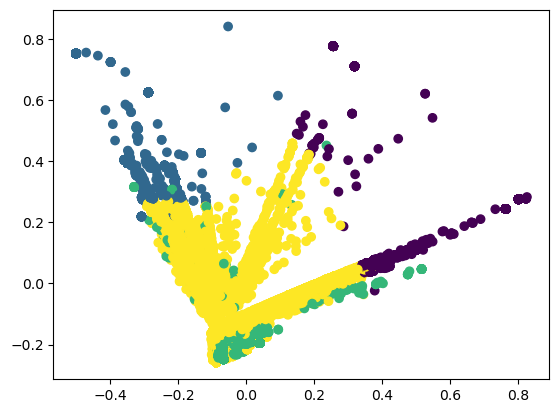

In [9]:
# Visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis')
plt.show()

In [10]:
# Analyze the clusters
df['cluster'] = y_kmeans
for i in range(3):
    print(f"Cluster {i}:")
    print(df[df['cluster'] == i]['content'].value_counts().head(10))

Cluster 0:
nice             4934
Nice             3799
Nice app         2126
nice app         1887
very nice         689
Very nice         469
Very nice app     434
very nice app     371
nice aap          165
Nice aap          144
Name: content, dtype: int64
Cluster 1:
good             3931
Good             3451
Good app         1029
good app          877
very good         654
Very good         554
Very good app     428
very good app     365
Good 👍            103
It's good          75
Name: content, dtype: int64
Cluster 2:
Best app                  719
Best                      681
best                      583
best app                  525
Best app for teenagers    181
best app for teenagers     97
Best app for teens         87
Best for teenagers         68
Best aap                   50
Best app ever              47
Name: content, dtype: int64


In [11]:
# save all outputs to files

with open('cluster0.txt', 'w') as f:
        for i in range(3):
                f.write(f"Cluster {i}:")
                f.write(str(df[df['cluster'] == i]['content'].value_counts().head(10)))
                f.write('\n')

with open('cluster1.txt', 'w') as f:
        for i in range(3):
                f.write(f"Cluster {i}:")
                f.write(str(df[df['cluster'] == i]['content'].value_counts().head(10)))
                f.write('\n')

with open('cluster2.txt', 'w') as f:
        for i in range(3):
                f.write(f"Cluster {i}:")
                f.write(str(df[df['cluster'] == i]['content'].value_counts().head(10)))
                f.write('\n')